#             数据挖掘互评作业3-Video Game Sales

一、加载数据，统计缺失数据

In [2]:
from pandas import Series,DataFrame,np
from numpy import nan as NA
import pandas as pd
from scipy.interpolate import lagrange
import matplotlib.pyplot as plt


#1.加载数据
def load_data(path,filename):
    return pd.read_csv(path + '/' + filename)
root = 'E:\\'
data = load_data(root,'vgsales.csv')#中文

#2.缺失数据统计 -列
data.isnull().sum()
print("每列缺失的数据个数分别为:")
print(data.isnull().sum())


e:\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  """Entry point for launching an IPython kernel.


每列缺失的数据个数分别为:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


二、缺失值处理
缺失属性值情况：Pulisher 缺58个，Year 缺 271个
1）观察发现Publisher与Platform属性关联较密切，根据上下文进行填充
2）Year与其他属性无明显关联，故删除缺失的Year
3）输出处理后的数据缺失情况，确保无缺失值

In [3]:
#3.1 缺失值填补-Publisher属性有缺失值，其与Platform属性关联较多，可按上下文进行填充
print("Publisher根据Platform值进行填补")
# 查看Publisher特征缺失处对应的包含Publisher所需要的信息的Platform特征的具体情况
Publisher_locationdes=data.loc[data['Publisher'].isnull(), 'Platform']
# 定位到Publisher特征缺失信息的具体位置
Publisher_loc=data.loc[data['Publisher'].isnull(), 'Platform']
# 结合前面两步，利用字符串提取来补充Publisher的缺失信息
data.loc[data['Publisher'].isnull(), 'Publisher'] = [str(x)[0: len(str(x))] for x in 

Publisher_locationdes]

#3.2删除缺失值-Year——无法根据其他信息推断出版时间，所以删除
print("Year删除缺失值")
#因为缺失值位于同一行，所以用Agency代表
data=data.dropna(axis=0,subset=['Year'])


#检验缺失值处理后是否还存在缺失值
print("填补后数据的缺失个数分别为:",data.isnull().sum())

#4.删除重复数据
print("删除重复数据")
#去重,默认保留前一个
df=data.drop_duplicates()


print("处理后的数据行数为:",df.shape[0])

Publisher根据Platform值进行填补
Year删除缺失值
填补后数据的缺失个数分别为: Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64
删除重复数据
处理后的数据行数为: 16327


三、数据描述

In [5]:
#5.汇总和描述等统计量的计算
print("汇总和描述等统计量的计算")
#对数据的基本统计量进行描述,得到每列数据的行数、平均值、协方差、最小值
#、四分之一分位数、中位数、四分之三分位数、最大值
print("对数据的基本统计量进行描述,得到每列数据的行数、平均值、协方差、最小值、四分之一分位数、中位数、四分之三分位数、最大值")
print(df.describe())

汇总和描述等统计量的计算
对数据的基本统计量进行描述,得到每列数据的行数、平均值、协方差、最小值、四分之一分位数、中位数、四分之三分位数、最大值
               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16327.000000  16327.000000  16327.000000  16327.000000  16327.000000   
mean    8292.868194   2006.406443      0.265415      0.147554      0.078661   
std     4792.669778      5.828981      0.821591      0.508766      0.311557   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4136.500000   2003.000000      0.000000      0.000000      0.000000   
50%     8295.000000   2007.000000      0.080000      0.020000      0.000000   
75%    12441.500000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2020.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16327.000000  16327.000000  
mean       0.048325      0.540232  
std        0.189885      1.565732  
min        0.000000      0.010000  
25%        0.000000      0.060000  

四、电子游戏市场分析
4.1 统计最受欢迎的游戏
4.1.1世界最畅销的20大游戏

In [6]:
print("世界最畅销的游戏top20:")
print("序号 ","标题 ","                 ","销量")
for i in range(0,20):
        if i+1==6 or i+1==8 or i+1==14:
            print(i+1," ",df.iloc[i,1],"             ",df.iloc[i,10]) 
        elif i+1==10 or i+1==11:
            print(i+1," ",df.iloc[i,1],"        ",df.iloc[i,10])     
        elif len(df.iloc[i,1])<=15:
            print(i+1," ",df.iloc[i,1],"        ",df.iloc[i,10])   
        else:
            print(i+1," ",df.iloc[i,1][:12],"...    ",df.iloc[i,10]) 

世界最畅销的游戏top20:
序号  标题                    销量
1   Wii Sports          82.74
2   Super Mario  ...     40.24
3   Mario Kart Wii          35.82
4   Wii Sports R ...     33.0
5   Pokemon Red/ ...     31.37
6   Tetris               30.26
7   New Super Ma ...     30.01
8   Wii Play               29.02
9   New Super Ma ...     28.62
10   Duck Hunt          28.31
11   Nintendogs          24.76
12   Mario Kart DS          23.42
13   Pokemon Gold ...     23.1
14   Wii Fit               22.72
15   Wii Fit Plus          22.0
16   Kinect Adven ...     21.82
17   Grand Theft  ...     21.4
18   Grand Theft  ...     20.81
19   Super Mario  ...     20.61
20   Brain Age: T ...     20.22


接下来分为北美洲、欧洲、日本和其他地区，分别统计最畅销的top20游戏及销量：
4.1.2 北美洲最畅销的20大游戏

In [7]:
print("北美洲最畅销的游戏top20:")
print("序号 ","标题 ","             ","销量")
df_na=df.sort_values(by='NA_Sales',ascending=False)
for i in range(0,20):
        if i+1==6:
            print(i+1," ",df_na.iloc[i,1],"  ",df_na.iloc[i,6]) 
        elif i+1==14:
            print(i+1," ",df_na.iloc[i,1],"      ",df_na.iloc[i,6])
        elif i+1==9 or i+1==4:
            print(i+1," ",df_na.iloc[i,1],"            ",df_na.iloc[i,6])
        elif len(df_na.iloc[i,1])<=10:
            print(i+1," ",df_na.iloc[i,1],"        ",df_na.iloc[i,6])   
        else:
            print(i+1," ",df_na.iloc[i,1][:12],"...    ",df_na.iloc[i,6])  

北美洲最畅销的游戏top20:
序号  标题                销量
1   Wii Sports          41.49
2   Super Mario  ...     29.08
3   Duck Hunt          26.93
4   Tetris              23.2
5   Mario Kart W ...     15.85
6   Wii Sports Resort    15.75
7   Kinect Adven ...     14.97
8   New Super Ma ...     14.59
9   Wii Play              14.03
10   Super Mario  ...     12.78
11   New Super Ma ...     11.38
12   Pokemon Red/ ...     11.27
13   Super Mario  ...     10.83
14   Mario Kart DS        9.81
15   Call of Duty ...     9.67
16   Grand Theft  ...     9.63
17   Super Mario  ...     9.54
18   Grand Theft  ...     9.43
19   Wii Fit Plus ...     9.09
20   Nintendogs          9.07


4.1.3 欧洲最畅销的20大游戏

In [8]:
print("欧洲最畅销的游戏top20:")
print("序号 ","标题 ","             ","销量")
df_eu=df.sort_values(by='EU_Sales',ascending=False)
for i in range(0,20):
        if i+1==6:
            print(i+1," ",df_eu.iloc[i,1],"  ",df_eu.iloc[i,7]) 
        elif i+1==14:
            print(i+1," ",df_eu.iloc[i,1],"      ",df_eu.iloc[i,7])
        elif i+1==9 or i+1==4:
            print(i+1," ",df_eu.iloc[i,1],"            ",df_eu.iloc[i,7])
        elif len(df_na.iloc[i,1])<=10:
            print(i+1," ",df_eu.iloc[i,1],"        ",df_eu.iloc[i,7])   
        else:
            print(i+1," ",df_eu.iloc[i,1][:12],"...    ",df_eu.iloc[i,7]) 

欧洲最畅销的游戏top20:
序号  标题                销量
1   Wii Sports          29.02
2   Mario Kart W ...     12.88
3   Wii Sports Resort          11.01
4   Nintendogs              11.0
5   Grand Theft  ...     9.27
6   Brain Age: Train Your Brain in Minutes a Day    9.26
7   New Super Ma ...     9.23
8   Wii Play ...     9.2
9   Pokemon Red/Pokemon Blue              8.89
10   Wii Fit Plus ...     8.59
11   Wii Fit ...     8.03
12   Mario Kart D ...     7.57
13   New Super Ma ...     7.06
14   The Sims 3        6.42
15   World of War ...     6.21
16   Pokemon Gold ...     6.18
17   FIFA 16 ...     6.06
18   Call of Duty ...     5.88
19   Call of Duty ...     5.82
20   Call of Duty: Black Ops 3          5.81


4.1.4 日本最畅销的20大游戏

In [9]:
print("日本最畅销的游戏top20:")
print("序号 ","标题 ","             ","销量")
df_jp=df.sort_values(by='JP_Sales',ascending=False)
for i in range(0,20):
        if i+1==15:
            print(i+1," ",df_jp.iloc[i,1],"            ",df_jp.iloc[i,8])
        elif len(df_jp.iloc[i,1])<=10:
            print(i+1," ",df_jp.iloc[i,1],"        ",df_jp.iloc[i,8])   
        else:
            print(i+1," ",df_jp.iloc[i,1][:12],"...    ",df_jp.iloc[i,8]) 



日本最畅销的游戏top20:
序号  标题                销量
1   Pokemon Red/ ...     10.22
2   Pokemon Gold ...     7.2
3   Super Mario  ...     6.81
4   New Super Ma ...     6.5
5   Pokemon Diam ...     6.04
6   Pokemon Blac ...     5.65
7   Pokemon Ruby ...     5.38
8   Animal Cross ...     5.33
9   Brain Age 2: ...     5.32
10   Monster Hunt ...     4.87
11   New Super Ma ...     4.7
12   Animal Cross ...     4.36
13   Dragon Quest ...     4.35
14   Pokemon X/Po ...     4.34
15   Tetris              4.22
16   Super Mario  ...     4.18
17   Brain Age: T ...     4.16
18   Monster Hunt ...     4.13
19   Mario Kart D ...     4.13
20   Dragon Quest ...     4.1


4.1.5 其他地区最畅销的20大游戏

In [10]:
print("其他地区最畅销的游戏top20:")
print("序号 ","标题 ","             ","销量")
df_other=df.sort_values(by='Other_Sales',ascending=False)
for i in range(0,20):
        if i+1==9 or i+1==15:
            print(i+1," ",df_other.iloc[i,1],"            ",df_other.iloc[i,9])
        elif i+1==2 or i+1==10:
            print(i+1," ",df_other.iloc[i,1],"         ",df_other.iloc[i,9])   
        elif len(df_jp.iloc[i,1])<=10:
            print(i+1," ",df_other.iloc[i,1],"        ",df_other.iloc[i,9])   
        else:
            print(i+1," ",df_other.iloc[i,1][:12],"...    ",df_other.iloc[i,9]) 



其他地区最畅销的游戏top20:
序号  标题                销量
1   Grand Theft  ...     10.57
2   Wii Sports           8.46
3   Gran Turismo ...     7.53
4   Grand Theft  ...     4.14
5   Mario Kart W ...     3.31
6   Wii Sports R ...     2.96
7   Pro Evolutio ...     2.93
8   New Super Ma ...     2.9
9   Wii Play              2.85
10   Nintendogs           2.75
11   Call of Duty ...     2.52
12   FIFA Soccer  ...     2.46
13   Call of Duty ...     2.31
14   New Super Ma ...     2.26
15   Wii Fit              2.15
16   Gran Turismo ...     2.12
17   Brain Age: T ...     2.05
18   PES 2009: Pr ...     2.05
19   Grand Theft  ...     2.02
20   FIFA Soccer  ...     2.01


4.2统计最受欢迎的类型Genre
从两个方面统计：频数最高的Genre和总销量最高的Genre
4.2.1 频数最高的类别

In [11]:
#6.2.1频数最高的类型
se_genre=pd.Series(df['Genre'])
count_genre=dict(se_genre.value_counts())
proport_genre = dict(se_genre.value_counts(normalize=True))
print("频数前十名的类别分别为:")
for i,(key,value) in enumerate(count_genre.items()):
    if i in range(0,10):
       print(key,value)
print("genre位于前十名的频率分别为:")
for i,(key,value) in enumerate(proport_genre.items()):
    if i in range(0,10):
       print(key,value)
print("\n")

频数前十名的类别分别为:
Action 3253
Sports 2304
Misc 1710
Role-Playing 1471
Shooter 1282
Adventure 1276
Racing 1226
Platform 876
Simulation 851
Fighting 836
genre位于前十名的频率分别为:
Action 0.19924052183499724
Sports 0.14111594291664115
Misc 0.1047344888834446
Role-Playing 0.0900961597354076
Shooter 0.07852024254302689
Adventure 0.07815275310834814
Racing 0.07509034115269186
Platform 0.05365345746309794
Simulation 0.0521222514852698
Fighting 0.051203527898572916




4.2.2 总销量最高的类别（按升序排序）

In [12]:
#6.2.2不同类型销量从低到高排序
grouped_genre=df['Global_Sales'].groupby(df['Genre'])
grouped_genre_sum=grouped_genre.sum()
grouped_genre_sort=grouped_genre_sum.sort_values()
print(grouped_genre_sort)

Genre
Strategy         173.43
Adventure        234.80
Puzzle           242.22
Simulation       390.16
Fighting         444.05
Racing           726.77
Misc             797.62
Platform         829.15
Role-Playing     923.84
Shooter         1026.20
Sports          1309.24
Action          1722.88
Name: Global_Sales, dtype: float64


4.3 统计最受欢迎的发布平台Platform
与类别类似，依旧分两方面统计
4.3.1 频数最高的发布平台

In [13]:
#6.3.1 频数最高的发布平台
se_platform=pd.Series(df['Platform'])
count_platform=dict(se_platform.value_counts())
proport_platform = dict(se_platform.value_counts(normalize=True))
print("频数前十名的发布平台分别为:")
for i,(key,value) in enumerate(count_platform.items()):
    if i in range(0,10):
       print(key,value)
print("genre位于前十名的频率分别为:")
for i,(key,value) in enumerate(proport_platform.items()):
    if i in range(0,10):
       print(key,value)
print("\n")

频数前十名的发布平台分别为:
DS 2133
PS2 2127
PS3 1304
Wii 1290
X360 1235
PSP 1197
PS 1189
PC 943
GBA 811
XB 803
genre位于前十名的频率分别为:
DS 0.1306424940282967
PS2 0.13027500459361793
PS3 0.07986770380351566
Wii 0.07901022845593189
X360 0.07564157530471
PSP 0.07331414221841122
PS 0.07282415630550622
PC 0.057757089483677346
GBA 0.04967232192074478
XB 0.04918233600783978




4.3.2 总销量最高的发布平台（按升序排序）

In [14]:
#6.3.2 不同发布平台销量从低到高排序
grouped_platform=df['Global_Sales'].groupby(df['Platform'])
grouped_platform_sum=grouped_platform.sum()
grouped_platform_sort=grouped_platform_sum.sort_values()
print(grouped_platform_sort)

Platform
PCFX       0.03
GG         0.04
3DO        0.10
TG16       0.16
WS         1.42
NG         1.44
SCD        1.87
DC        15.97
GEN       28.36
SAT       33.59
PSV       61.63
WiiU      81.86
2600      86.57
XOne     141.06
GC       197.14
SNES     200.05
N64      218.21
3DS      246.28
NES      251.07
XB       252.09
GB       254.42
PC       255.05
PS4      278.10
PSP      291.71
GBA      313.56
PS       727.39
DS       818.96
Wii      909.81
PS3      949.35
X360     969.61
PS2     1233.46
Name: Global_Sales, dtype: float64


4.4 最受欢迎的发行人
与类别、发布平台类似，从两方面进行统计。
4.4.1 频数最高的发行人

In [15]:
#6.4.1 频数最高的发行人
se_publisher=pd.Series(df['Publisher'])
count_publisher=dict(se_publisher.value_counts())
proport_publisher = dict(se_publisher.value_counts(normalize=True))
print("频数前十名的发布平台分别为:")
for i,(key,value) in enumerate(count_publisher.items()):
    if i in range(0,10):
       print(key,value)
print("genre位于前十名的频率分别为:")
for i,(key,value) in enumerate(proport_publisher.items()):
    if i in range(0,10):
       print(key,value)
print("\n")

频数前十名的发布平台分别为:
Electronic Arts 1339
Activision 966
Namco Bandai Games 928
Ubisoft 918
Konami Digital Entertainment 823
THQ 712
Nintendo 696
Sony Computer Entertainment 682
Sega 632
Take-Two Interactive 412
genre位于前十名的频率分别为:
Electronic Arts 0.08201139217247504
Activision 0.05916579898327923
Namco Bandai Games 0.056838365896980464
Ubisoft 0.05622588350584921
Konami Digital Entertainment 0.050407300790102284
THQ 0.043608746248545355
Nintendo 0.04262877442273535
Sony Computer Entertainment 0.04177129907515159
Sega 0.038708887119495314
Take-Two Interactive 0.025234274514607705




4.4.2 总销量最高的发行人（按升序排序）

In [16]:
#6.4.2 不同发行人销量从低到高排序
grouped_publisher=df['Global_Sales'].groupby(df['Publisher'])
grouped_publisher_sum=grouped_publisher.sum()
grouped_publisher_sort=grouped_publisher_sum.sort_values()
print(grouped_publisher_sort)

Publisher
New World Computing               0.01
Ascaron Entertainment             0.01
Stainless Games                   0.01
Rain Games                        0.01
Piacci                            0.01
                                ...   
Ubisoft                         473.54
Sony Computer Entertainment     607.28
Activision                      721.41
Electronic Arts                1093.39
Nintendo                       1784.43
Name: Global_Sales, Length: 582, dtype: float64


5.预测每年电子游戏销售额（按销售额升序排序）
对Year分组，以小组为单位对Global_Sales求和

In [17]:
#7每年电子游戏销售额
grouped_year=df['Global_Sales'].groupby(df['Year'])
grouped_year_sum=grouped_year.sum()
grouped_year_sort=grouped_year_sum.sort_values()
print(grouped_year_sort)

Year
2017.0      0.05
2020.0      0.29
1980.0     11.38
1983.0     16.79
1987.0     21.74
1982.0     28.86
1991.0     32.23
1981.0     35.77
1986.0     37.07
1993.0     45.98
1988.0     47.22
1990.0     49.39
1984.0     50.36
1985.0     53.94
2016.0     70.93
1989.0     73.45
1992.0     76.16
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
2000.0    201.56
1999.0    251.27
1998.0    256.47
2015.0    264.44
2001.0    331.47
2014.0    337.05
2003.0    357.85
2012.0    363.54
2013.0    368.11
2002.0    395.52
2004.0    419.31
2005.0    459.94
2011.0    515.99
2006.0    521.04
2010.0    600.45
2007.0    611.13
2009.0    667.30
2008.0    678.90
Name: Global_Sales, dtype: float64


In [22]:
#输出每年发行的游戏数量
grouped_year_count=grouped_year.count()
grouped_year_sort=grouped_year_count.sort_values()
grouped_year_sort

Year
2020.0       1
2017.0       3
1980.0       9
1984.0      14
1985.0      14
1988.0      15
1987.0      16
1990.0      16
1983.0      17
1989.0      17
1986.0      21
1982.0      36
1991.0      41
1992.0      43
1981.0      46
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1999.0     338
2016.0     344
2000.0     349
1998.0     379
2001.0     482
2013.0     546
2014.0     582
2015.0     614
2012.0     657
2004.0     763
2003.0     775
2002.0     829
2005.0     941
2006.0    1008
2011.0    1139
2007.0    1202
2010.0    1259
2008.0    1428
2009.0    1431
Name: Global_Sales, dtype: int64

6.可视化
6.1直方图

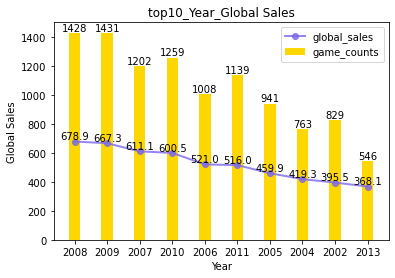

In [29]:
#直方图-前十总销量最高的年份及销量
label = ['2008', '2009', '2007', '2010', '2006', '2011','2005', '2004', '2002', '2013']
year_sales = [678.90, 667.30, 611.1, 600.5, 521.0, 516.0,459.9, 419.3, 395.5, 368.1]
year_count= [1428,1431,1202,1259,1008,1139,941,763,829,546]
x = np.arange(len(label))
width = 0.35
plt.bar(x,year_count,width=width,label="game_counts",color='gold',tick_label=label)
plt.plot(x, year_sales, 'ro-', color='mediumslateblue', alpha=0.8, linewidth=2, label='global_sales')

# 显示在图形上的值
for a, b in zip(x, year_count):
    plt.text(a, b + 0.005, b, ha='center', va='bottom')
for a, b in zip(x, year_sales):
    plt.text(a, b + 0.005, b, ha='center', va='bottom')
# for a, b in zip(x, lmr_r):
#     plt.text(a + width, b + 0.005, b, ha='center', va='bottom')

plt.xticks()
plt.legend(loc="upper right")  # 防止label和图像重合显示不出来
plt.xlabel('Year')
plt.ylabel('Global Sales')
title_str = "top10_Year_Global Sales"
plt.title(title_str)
plt.show()

6.2 盒图

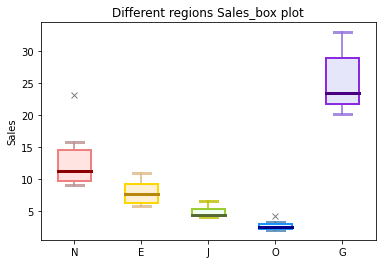

In [59]:
na=[23.2,15.85,15.75,14.97,14.59,14.03,12.78,11.38,11.27,10.83,9.81,9.67,9.63,9.54,9.43,
   9.09,9.07]
eu=[11.0,9.27,9.26,9.23,9.2,8.89,8.59,8.03,7.57,7.06,6.42,6.21,6.18,6.06,5.88,5.82,5.81]
jp=[6.5,6.04,5.65,5.38,5.33,5.32,4.87,4.7,4.36,4.35,4.34,4.22,4.18,4.16,4.13,4.13,4.1]
other=[4.14,3.31,2.96,2.93,2.9,2.85,2.7,2.52,2.46,2.31,2.26,2.15,2.12,2.05,2.05,2.02,2.01]
gb=[33.0,31.37,30.26,30.01,29.02,28.62,28.31,24.76,23.42,23.1,22.72,22.0,21.82,21.4,20.81,
   20.61,20.22]
def drawbox2(na,eu,jp,other,gb):
    tang_data = [na,eu,jp,other,gb]

    #axes = plt.plot(nrows=1, ncols=1, figsize=(12, 5))
    
    # 绘制分类散点图
    # INPUT  -> 分组列, 统计列

    # 添加分布散点图 boxplot with jitter

    color_boxes = ['mistyrose','papayawhip','honeydew','aliceblue','lavender'] # 盒图填充颜色

    ###############################################################

    f = plt.boxplot(tang_data,patch_artist=True,showfliers=None)

    # 这里共有四个box
    color_edge=['lightcoral','gold','yellowgreen','dodgerblue','blueviolet']
    for box, cb,ce in zip(f['boxes'], color_boxes,color_edge):
        # 箱体边框颜色
        box.set(color=ce, linewidth=2)
        # 箱体内部填充颜色
        box.set(facecolor=cb)

    color_w=['rosybrown','rosybrown','burlywood','burlywood','y','y','steelblue','steelblue',
            'mediumpurple','mediumpurple']
    # 这里设置的是各个box的其他属性
    for whisker,cw in zip(f['whiskers'],color_w):
        whisker.set(color=cw, linewidth=2,alpha=0.8)
    color_c = ['rosybrown','rosybrown','burlywood','burlywood','y','y','steelblue','steelblue',
              'mediumpurple','mediumpurple']
    for cap,cc in zip(f['caps'],color_c):
        cap.set(color=cc, linewidth=3,alpha=0.8)
    #中位线
    color_median=['darkred','darkgoldenrod','darkolivegreen','DarkBlue','indigo']
    for median,cm in zip(f['medians'],color_median):
        median.set(color=cm, linewidth=3)

    for flier in f['fliers']:
        flier.set(marker='x', color='w', alpha=0.5)
    #####################################################
    plt.title('Different regions Sales_box plot')

    # for ax in axes:
    # 对y轴加上网格

    # 对每个图加上xticks操作
    plt.ylabel('Sales')
    ticks = '1NEJOG'
    plt.xticks(range(6),ticks)
    plt.plot()
    plt.show()
    
drawbox2(na,eu,jp,other,gb)